In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:

pd.set_option('display.max_columns', None)

In [15]:
df = pd.read_csv(r'E:\Mumbai Flat Real Estate Intelligence\datasets\mumbai_properties_cleaned_v2.csv').drop_duplicates()

In [16]:
df['major_location'] = df['major_location'].replace('Other', 'others')

In [17]:
df.sample(2)

,price,bedrooms,bathrooms,balcony,property_age,major_location,built_up_area,furnishing_type
3923,1.76,2,2,0,new construction,Mulund West,950.0,Furnished
4999,2.22,2,1,0,new construction,Ghatkopar East,709.0,Furnished


<Axes: xlabel='furnishing_type', ylabel='price'>

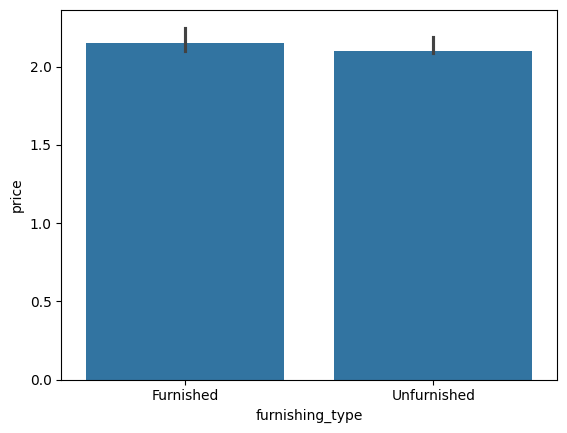

In [18]:
sns.barplot(x=df['furnishing_type'], y=df['price'], estimator=np.median)

<Axes: xlabel='property_age', ylabel='price'>

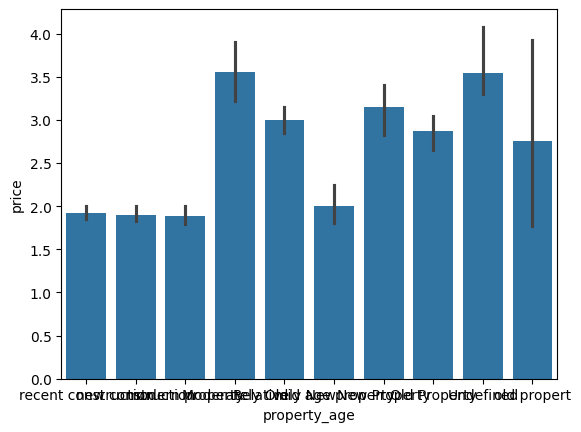

In [19]:
sns.barplot(x=df['property_age'], y=df['price'], estimator=np.median)

<Axes: xlabel='furnishing_type', ylabel='price'>

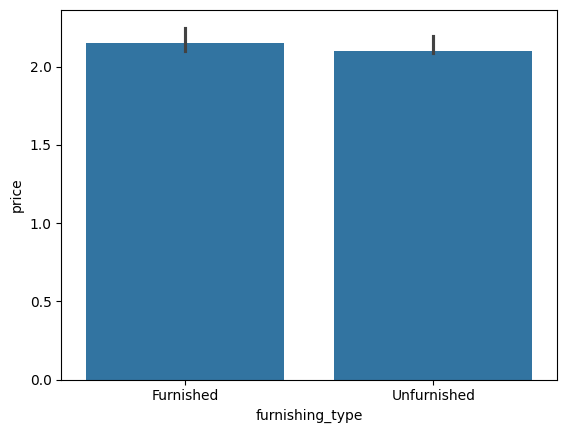

In [20]:
sns.barplot(x=df['furnishing_type'], y=df['price'], estimator=np.median)

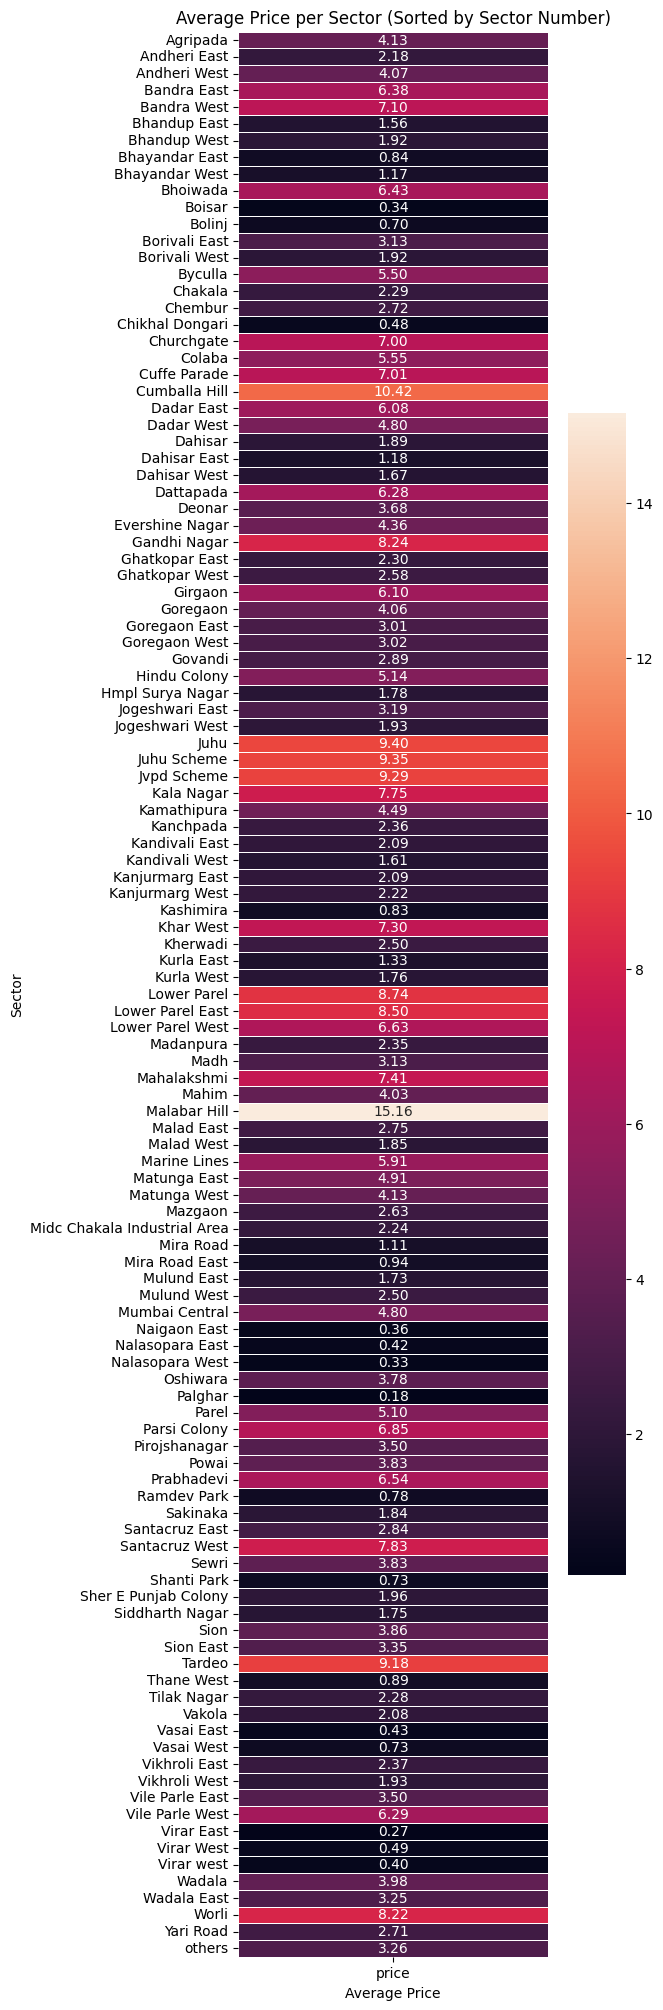

In [21]:
# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_major_location = df.groupby('major_location')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_major_location_number(major_location_name):
    match = re.search(r'\d+', major_location_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_major_location['sector_number'] = avg_price_per_major_location['major_location'].apply(extract_major_location_number)

# Sort by sector number
avg_price_per_major_location_sorted_by_major_location = avg_price_per_major_location.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_major_location_sorted_by_major_location.set_index('major_location')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

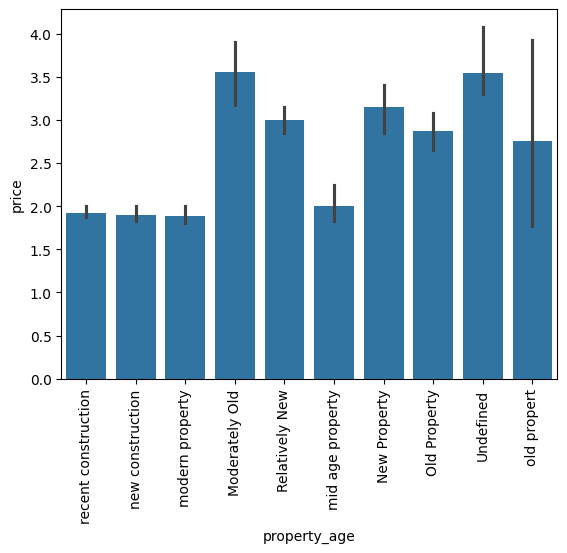

In [22]:
sns.barplot(x=df['property_age'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

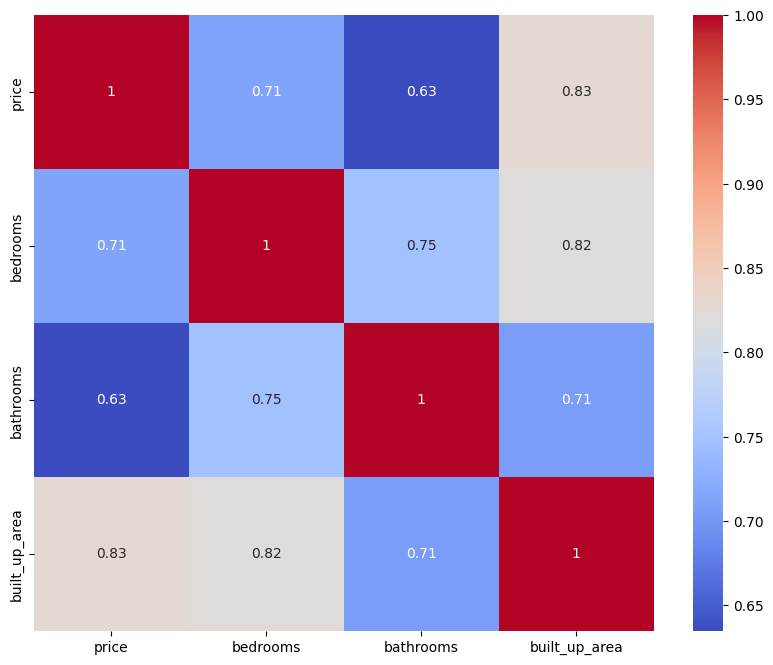

In [23]:
plt.figure(figsize=(10,8))

numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

numeric_df.corr()['price'].sort_values(ascending=False)


price            1.000000
built_up_area    0.827570
bedrooms         0.714294
bathrooms        0.634721
Name: price, dtype: float64